
Analyzing the Top 10 Songs 2010 to 2019 from Spotify

The basic premise behind the project is to answer several research based questions.

How can I represent the different variables in a way that makes sense.

How are the top 10 songs's attributes are related to each other

Are there any trends in the pop, energy, dancability etc. among the top songs.

Is there any patterns to why people streamed these songs?

What variables seem to be the most common among the songs

The most popular pop?

Most popular bpm?
etc.

In [16]:
# Dependencies and Setup
import pandas as pd
import matplotlib.pyplot as plt
music = "top10s.csv"
song = pd.read_csv(music,encoding = "cp1252")
import seaborn as sns

song.head()

,Unnamed: 0,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,1,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83
1,2,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82
2,3,TiK ToK,Kesha,dance pop,2010,120,84,76,-3,29,71,200,10,14,80
3,4,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,295,0,4,79
4,5,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,9,43,221,2,4,78


In [17]:
Unnamed = song.loc[:, ["title", "artist", "top genre"]]
Unnamed

,title,artist,top genre
0,"Hey, Soul Sister",Train,neo mellow
1,Love The Way You Lie,Eminem,detroit hip hop
2,TiK ToK,Kesha,dance pop
3,Bad Romance,Lady Gaga,dance pop
4,Just the Way You Are,Bruno Mars,pop
...,...,...,...
598,Find U Again (feat. Camila Cabello),Mark Ronson,dance pop
599,Cross Me (feat. Chance the Rapper & PnB Rock),Ed Sheeran,pop
600,"No Brainer (feat. Justin Bieber, Chance the Ra...",DJ Khaled,dance pop
601,Nothing Breaks Like a Heart (feat. Miley Cyrus),Mark Ronson,dance pop


In [18]:
song_demographics_total = Unnamed["top genre"].value_counts()
song_demographics_total

dance pop                    327
pop                           60
canadian pop                  34
barbadian pop                 15
boy band                      15
electropop                    13
british soul                  11
big room                      10
neo mellow                     9
canadian contemporary r&b      9
art pop                        8
hip pop                        6
complextro                     6
australian dance               6
edm                            5
atl hip hop                    5
australian pop                 5
permanent wave                 4
latin                          4
hip hop                        4
tropical house                 3
colombian pop                  3
acoustic pop                   2
folk-pop                       2
brostep                        2
canadian hip hop               2
indie pop                      2
downtempo                      2
detroit hip hop                2
electro                        2
electronic

In [19]:
popular_formatted = song.sort_values(["dnce"], ascending=False).head()
popular_formatted

,Unnamed: 0,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
570,571,Drip (feat. Migos),Cardi B,pop,2018,130,59,97,-8,8,27,264,5,26,45
539,540,Bad Liar,Selena Gomez,dance pop,2018,121,41,97,-6,8,73,215,19,7,75
257,258,Anaconda,Nicki Minaj,dance pop,2014,130,60,96,-6,21,65,260,7,18,50
389,390,Me Too,Meghan Trainor,dance pop,2016,124,69,93,-6,48,84,181,10,10,73
477,478,Bodak Yellow,Cardi B,pop,2017,125,72,93,-6,35,46,224,7,11,70


Now, I want to use the pandas dataframe to see the number of songs an artist has in the top top 10 streamed and to create a quick graph of the top 10.

Unnamed: 0  title                                artist            top genre   year  bpm  nrgy  dnce  dB  live  val  dur  acous  spch  pop
603         Kills You Slowly                     The Chainsmokers  electropop  2019  150  44    70    -9  13    23   213  6      6     67     1
207         Give It 2 U                          Robin Thicke      dance pop   2013  127  83    67    -4  16    58   230  10     7     41     1
205         Overdose                             Ciara             dance pop   2013  107  70    77    -6  6     79   227  1      3     43     1
204         People Like Us                       Kelly Clarkson    dance pop   2013  128  79    60    -5  36    61   259  4      4     45     1
203         Ooh La La (from "The Smurfs 2")      Britney Spears    dance pop   2013  128  57    69    -5  11    73   257  2      5     45     1
202         Crazy Kids (feat. will.i.am)         Kesha             dance pop   2013  128  75    72    -4  13    50   229  4      4     46    

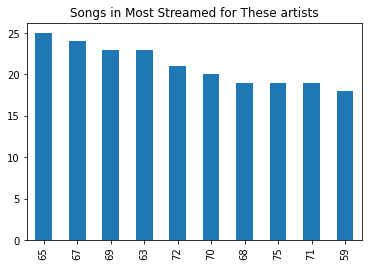

In [20]:
print(song.value_counts().head(10))
# plotting the top ten song and how many of their songs were in the most dancerble
plt.show(song['dnce'].value_counts().head(10).plot(kind='bar', title='Songs in Most Streamed for These artists'))

Now onto a bit more data analysis. Next I'm going to define what a 'good' danceability is:

In [21]:
very_dance = song['dnce'] >= 0.75
meh_dance = (song['dnce'] >= 0.5) & (song['dnce'] < 0.75)
not_dance = song['dnce'] < 0.5
# the danceability facotr of a song is a factor of both tempo and time signature-->Spotify calculated it as a decimal value

Determining the percentages of songs that make up the categories I had defined

In [22]:
dance_data = [very_dance.sum(), meh_dance.sum(), not_dance.sum()]
Dance = pd.DataFrame(dance_data, columns=['percent'],
                     index=['Very Danceable', 'Regular', 'Not Really'])
print(Dance)

                percent
Very Danceable      602
Regular               0
Not Really            1


A Density Plot visualises the distribution of data over a continuous interval or time period. This chart is a variation of a Histogram that uses kernel smoothing to plot values, allowing for smoother distributions by smoothing out the noise.

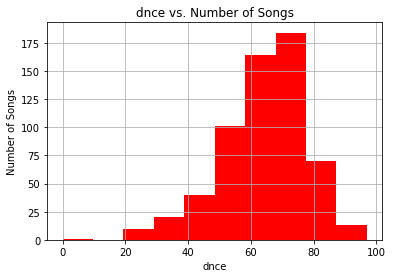

C:\Users\danie\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


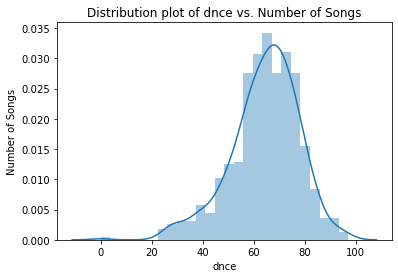

In [23]:

song['dnce'].hist(color='red')
plt.title('dnce vs. Number of Songs')
plt.xlabel('dnce')
plt.ylabel('Number of Songs')
plt.show()

sns.distplot(song['dnce'], hist=True, kde=True)
plt.title('Distribution plot of dnce vs. Number of Songs')
plt.xlabel('dnce')
plt.ylabel('Number of Songs')
plt.show()

In the histograph, it's slightly skewed to the right—indicating that the majority of songs in the top 10 streamed are danceable.

Next, I want to take a look at the energy of the songs to see if there's any correlation between the two. (I'm replicating the process from above—including the defining of the categories)

In [24]:
# Here I'm defining the parameters:
very_energetic = song['nrgy'] >= 0.75
regular_nrgy = (song['nrgy'] >= 0.5) & (song['nrgy'] < 0.75)
least_energetic = song['nrgy'] < 0.5

In [25]:
# Next, I'm creating the dataframe:
data2 = [very_energetic.sum(), regular_nrgy.sum(), least_energetic.sum()]
nrgy = pd.DataFrame(data2, columns=['percent'],
                      index=['Very nrgy', 'Regular nrgy', 'Low nrgy'])
#And I'm going to print Energy
print(nrgy)

              percent
Very nrgy         602
Regular nrgy        0
Low nrgy            1


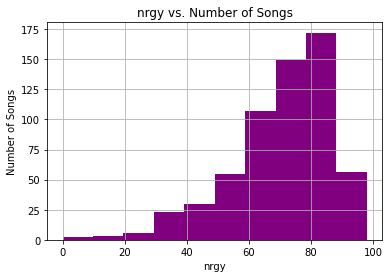

C:\Users\danie\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


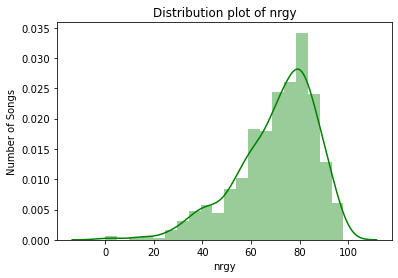

In [26]:
song['nrgy'].hist(color='purple')
plt.title('nrgy vs. Number of Songs')
plt.xlabel('nrgy')
plt.ylabel('Number of Songs')
plt.show()

sns.distplot(song['nrgy'], hist=True, kde=True, color='green')
plt.title('Distribution plot of nrgy')
plt.xlabel('nrgy')
plt.ylabel('Number of Songs')
plt.show()



Now I'm going to go more into depth about the correlation of all the different values in the dataset

In pandas, there's also a function called .corr()—it basically finds the correlation of the different variables in the dataset (closer to +/- 1 means a stronger positive/negative correlation).

In [27]:
print(song.corr())

            Unnamed: 0      year       bpm      nrgy      dnce        dB  \
Unnamed: 0    1.000000  0.989031 -0.114849 -0.214586  0.074920 -0.133914   
year          0.989031  1.000000 -0.104247 -0.225596  0.079269 -0.126471   
bpm          -0.114849 -0.104247  1.000000  0.126170 -0.131301  0.183870   
nrgy         -0.214586 -0.225596  0.126170  1.000000  0.167209  0.537528   
dnce          0.074920  0.079269 -0.131301  0.167209  1.000000  0.233170   
dB           -0.133914 -0.126471  0.183870  0.537528  0.233170  1.000000   
live         -0.129865 -0.136331  0.081579  0.186738 -0.028801  0.081934   
val          -0.129002 -0.122025  0.016021  0.409577  0.501696  0.282922   
dur          -0.210783 -0.215344 -0.029359 -0.143610 -0.176841 -0.104723   
acous         0.096518  0.101725 -0.113257 -0.562287 -0.240064 -0.190401   
spch          0.013672  0.004778  0.058999  0.107313 -0.028041 -0.001110   
pop           0.150420  0.241261  0.018983 -0.057645  0.116054  0.156897   

           

Text(0.5, 1.0, 'The Correlation Between the Variables')

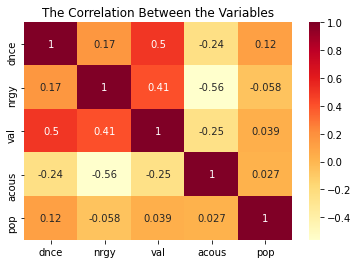

In [28]:
Correlation=song[['dnce','nrgy','val','acous','pop']]
sns.heatmap(Correlation.corr(), annot=True, cmap="YlOrRd")
plt.title("The Correlation Between the Variables")
# Here I'm using a heatmap to see the different values that correlate

Two main variables that piqued my intrest were the danceability versus the energy of a song. So I wanted to plot the correlation of both the two using a joint plot from sns.

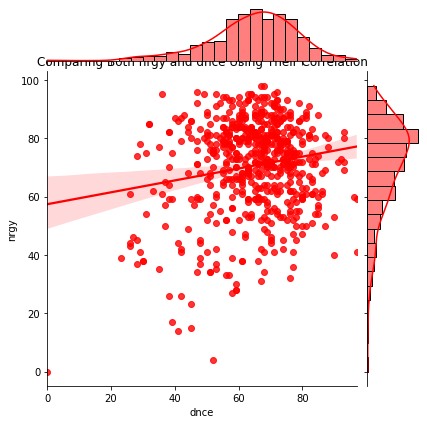

In [29]:
sns.jointplot(data=Correlation, y='nrgy', x='dnce', kind='reg', color='red')
plt.title("Comparing Both nrgy and dnce Using Their Correlation")
plt.show()


As the values of danceability are higher than zero the probability that our song has a high content of rhythms is higher, in general these values should be kept below zero but not very far away.

Taking a Look at pop

To take a better look into pop, I want to define the pop using the bpm (ex. a tempo of about 110bpm is technically considered Allegro—there is always some leeway, too).

In [30]:
song['bpm'] = song['pop']
song.loc[song['pop'] > 168, 'bpm'] = 'Presto'
song.loc[(song['pop'] >= 110) & (song['pop'] <= 168), 'bpm'] = 'Allegro'
song.loc[(song['pop'] >= 76) & (song['pop'] <= 108), 'bpm'] = 'Andante'
song.loc[(song['pop'] >= 66) & (song['pop'] <= 76), 'bpm'] = 'Adagio'
song.loc[song['pop'] < 65, 'bpm'] = 'Largo'

Now to graph pop and the amount of songs that were classified as such.

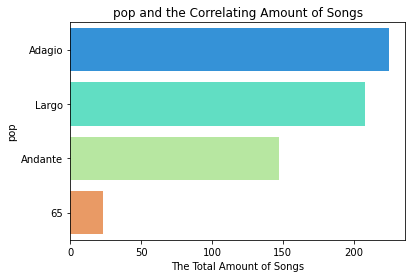

In [31]:
song['bpm'].value_counts()
Rhy = song['bpm'].value_counts()
Rhy_DF = pd.DataFrame(Rhy)
sns.barplot(x=Rhy_DF.bpm, y=Rhy_DF.index, palette="rainbow")
plt.xlabel('The Total Amount of Songs')
plt.ylabel('pop')
plt.title('pop and the Correlating Amount of Songs')
plt.show()


With the graph, we can definitely see a lot of the songs in the top 10 are allegro and andante, definitely suggesting that these pops are used quite a lot.

In [32]:
# Here I want to give the actual values for the amount in each category
song['bpm'].value_counts()

Adagio     225
Largo      208
Andante    147
65          23
Name: bpm, dtype: int64


The Tonality of the Songs

Now I want to take the time to analyze how the spch of the song (whether it's major or minor) has variables that have more importance or not.

In [33]:
# creating new dataframes seperated by their modes
Major = song[song['spch'] == 1]
Minor = song[song['spch'] == 0]

# Using danceability to streamline the data further
MajorD = Major[Major['dnce'] >= 0.5]
MinorD = Minor[Minor['dnce'] >= 0.5]

#Dropping columns that don't have any use (mode we already defined and know because of the dataset's name)
MajorD = Major.drop(columns=['spch', 'dur'])
MinorD = Minor.drop(columns=['spch', 'dur'])

Next I want to see the correlation of the values in the data and compare them against each other

Empty DataFrame
Columns: [dnce, nrgy, val, acous, pop]
Index: []


C:\Users\danie\Anaconda3\lib\site-packages\seaborn\matrix.py:204: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
C:\Users\danie\Anaconda3\lib\site-packages\seaborn\matrix.py:209: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


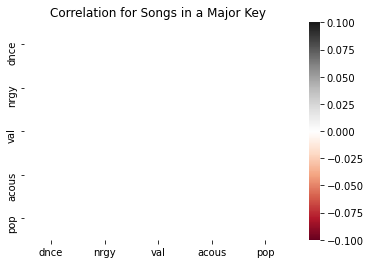

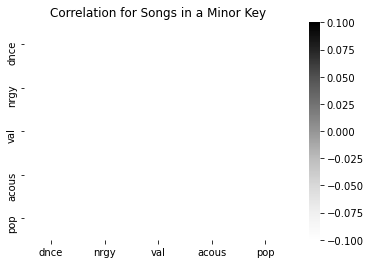

In [41]:
# Here I'm making a dataframe with the variables I want to see correlation in
MajcorD = MajorD[['dnce', 'nrgy', 'val', 'acous', 'pop']]
MinorcorD = MinorD[['dnce', 'nrgy', 'val', 'acous', 'pop']]
print(MajcorD.head())

# Next graphing such values
sns.heatmap(MajcorD.corr(), annot=True, cmap="RdGy")
plt.title('Correlation for Songs in a Major Key')
plt.show()

sns.heatmap(MinorcorD.corr(), annot=True, cmap="Greys")
plt.title('Correlation for Songs in a Minor Key')
plt.show()


Looking at the graphs above there are certain values that correlate a lot more for the different modality. In minor songs, acous and energy are more closely correlated than that in a Major bpm  (same with acost and valence, how happy it sounds)—possibly more minor-sounding songs are much easier to have more freedom versus the restrictive nature of major keys (from a music composition view). There differences in the correlation in the types modes.

Now I want to see how prevalent a bpm  is in the top 10 songs.

In [35]:
# Converting standard Pitch Class notation to the normal letter: 0 = C, 1 = C♯/D♭, 2 = D, and so on.
song.loc[ song['bpm'] == 0 ,'bpm'] ='C'    
song.loc[ song['bpm'] == 1 ,'bpm'] ='C#'    
song.loc[ song['bpm'] == 2 ,'bpm'] ='D'    
song.loc[ song['bpm'] == 3 ,'bpm'] ='D#'    
song.loc[ song['bpm'] == 4 ,'bpm'] ='E'    
song.loc[ song['bpm'] == 5 ,'bpm'] ='F'    
song.loc[ song['bpm'] == 6 ,'bpm'] ='F#'    
song.loc[ song['bpm'] == 7 ,'bpm'] ='G'    
song.loc[ song['bpm'] == 8 ,'bpm'] ='G#'    
song.loc[ song['bpm'] == 9 ,'bpm'] ='A'    
song.loc[ song['bpm'] == 10 ,'bpm'] ='A#' 
song.loc[ song['bpm'] == 11 ,'bpm'] ='B'

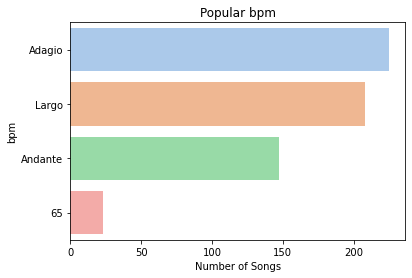

In [36]:
# building the graph with the total value counts
bpm = song['bpm'].value_counts()
bpm_DF = pd.DataFrame(bpm)
sns.barplot(x=bpm_DF.bpm, y=bpm_DF.index, palette="pastel")
plt.ylabel('bpm')
plt.xlabel('Number of Songs')
plt.title('Popular bpm')
plt.show()